# EE-25620: Deep Learning

# HW3. NumPy Based CNN block (20 + 10 points)

##   Outline of the Assignment

You will be implementing the building blocks of a convolutional neural network

1. **`zero padding`**

2. **`convolution : Forward`**

3. **`convolution : Backwrd`**

4. **`Max pooling`**

5. **`Batch Normalization in CNN `**


    
This notebook will ask you to implement these functions from scratch in **`Numpy`**.


**Note** that for every forward function, there is its corresponding backward equivalent. 

**توضیحات**

در این نوت بوک میخواهیم یک سری از توابعی که برای شبکه های کانولوشنالی نیاز است را با استفاده از کتابخانه نامپای پیاده سازی کنیم. 

In [ ]:
%tensorflow_version 1.x

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 1. Zero Padding (2 pts.)

Zero-padding adds zeros around the border of an image:

**Exercise**  : Implement the following function, which pads all the images of a batch of examples X with zeros.

shape of X and its zero pad array is :


$$ X : (N, C, i_h, i_w)   $$
$$  \text{zeropad}(X) : (N, C, i_h + 2*ph, i_w + 2*pw)$$

**Note** : you should not use np.pad in your implementation

In [ ]:
def zero_padding(X, padding):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image.

    input :
      - X :  numpy array of shape (N, C, IH, IW) representing a batch of N images
      - padding : a tuple of 2 integer (ph, pw), amount of padding around each image on vertical and horizontal dimensions
    return :
      - zero_pad : zero pad array of shape (N, C, IH + 2*ph, IW + 2*pw)
    
    """
  
    zero_pad = None
    ###########################################################################
    # Hint: you should not use the function np.pad for padding.                     
    ###########################################################################
    pass

    [N,C,ih,iw] = X.shape
    zero_pad = np.zeros((N,C,ih+2*padding[0],iw+2*padding[1]))
    zero_pad[:, :, padding[0]:padding[0]+ih, padding[1]:padding[1]+iw] = X
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return zero_pad
    
    
    

your implementation is correct
shape of x is : (2, 3, 4, 4)
shape of x_pad is : (2, 3, 10, 8)


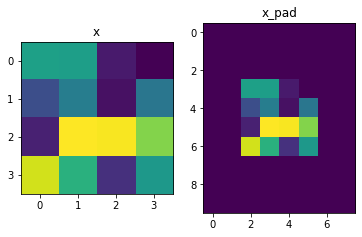

In [ ]:
#test zero_padding function
np.random.seed(1968)

x = np.random.rand(2, 3 ,4, 4)
padding = (3, 2)
x_pad = zero_padding(x, padding)

assert x_pad.shape==(x.shape[0], x.shape[1], x.shape[2] + 2*padding[0], x.shape[3] + 2*padding[1])
assert np.all(x_pad[:, :, padding[0]:padding[0]+x.shape[2], padding[1]:padding[1]+x.shape[3]]==x)

print("your implementation is correct")
print("shape of x is :", x.shape)
print("shape of x_pad is :", x_pad.shape)

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, 0, :, :])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, 0, :, :])

## 2.convolution : Forward (4 pts.)

In this Exercise, you implement convolutional neural networks using the NumPy library only.

The input X,W are the input of the convolutional layer and the shape of X,W are $(N, C, i_h, i_w)$ , $(F, C, f_h, f_w)$ respectively and The return  value O is the output of the convolutional layer and the shape is $(N, F, O_h, O_w)$ where :

$$\text{stride} : (s_h,s_w)$$

$$\text{padding} : (p_h,p_w)$$

$$O_w =\lfloor \frac{i_w - f_w + 2*p_w}{s_w} \rfloor + 1$$

$$O_h = \lfloor\frac{i_h - f_h + 2*p_h}{s_h}\rfloor + 1$$
$$O(b,f, i ,j)=\sum_{r=0}^{C-1}\sum_{k=0}^{f_h-1}\sum_{l=0}^{f_w-1} W(f,r,k,l) X(b,r,s_h *i +k, s_w  *j +l)$$

In [ ]:
def convolution2D(X, W, stride, padding):
    """
    A implementation of the forward pass for a convolutional layer.
    
    The input consists of N data points, each with C channels, height IH and
    width IW .We convolve each input with F different filters, where each filter
    spans all C channels and has height FH and width FW.
    
    
    inputs:
     - X : input data of shape (N, C, IH, IW)
     - W : Filter weight of shape (F, C, FH, FW)
     - stride : a tuple of 2 integer (sh, sw)
     - padding :a tuple of 2 integer (ph, pw)
     
    return:
     - out : Output data, of shape (N, F, OH, OW) where OH and OW given by
     
     OH= 1 + int ( (IH + 2*ph - FH)/ sh )
     OW= 1 + int ( (IW + 2*pw - FW)/ sw )
    
    """
    
    out = None
    ###########################################################################
    # Implement the convolutional forward pass.                               #
    ###########################################################################
    pass

    [N,C,ih,iw] = X.shape
    [F,C,fh,fw] = W.shape 
    ph = padding[0]
    pw = padding[1]
    sh = stride[0]
    sw = stride[1]
    Oh= 1 + int ((ih + 2*ph - fh)/sh)
    Ow= 1 + int ((iw + 2*pw - fw)/sw)
    out = np.zeros((N,F,Oh,Ow))

    x_pad = zero_padding(X, padding)

    for b in range(N):
      for f in range(F):
        for i in range(0,ih,sh):
          for j in range(0,iw,sw):
            out[b][f][int(i/sh)][int(j/sw)] = np.sum(x_pad[b,:,i:i+fh,j:j+fw]*W[f,:,:,:])

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return out
    
    





To test your implementation, we will compare the results  with tensorflow function

In [ ]:
np.random.seed(1973)
param1 = {'X':np.random.rand(2, 3, 23, 20), 'W':np.random.rand(7, 3, 6, 6), 'stride':(3, 6), 'padding':(2, 3)}
x_tf = np.pad(param1['X'], ((0, 0), (0, 0), (2, 2), (3, 3)), 'constant', constant_values=0)


conv_numpy = convolution2D(**param1)
conv = tf.nn.conv2d(tf.transpose(x_tf, [0 ,2, 3, 1]), tf.transpose(param1['W'], (2, 3, 1, 0)), [1, 3, 6, 1], 'VALID')
conv = tf.transpose(conv, (0, 3, 1, 2))

with tf.Session() as sess:
    conv = sess.run(conv)

assert conv.shape==conv_numpy.shape
print("Error :", (np.sum(conv - conv_numpy)**2))
print("output shape :", conv_numpy.shape)


Error : 2.4435755400126062e-26
output shape : (2, 7, 8, 4)


** Expected Output: **
<table>
    <tr>
        <td>
            **out shape**
        </td>
        <td>
            (2, 7, 8, 4)
        </td>
    </tr>
    <tr>
        <td>
            **ERROR**
        </td>
        <td>
            2.5559093329160782e-28
       </td>
    </tr>
    
</table>


## 3.convolution : Backward

### 3.1 - Backward  w.r.t. filter (4 pts.)

This is the formula for computing a $\frac{\partial L}{\partial W}$ for a single $W(f^\prime,c^\prime,k^\prime ,l^\prime )$ that $W$ is 4-D array as a filter in convolution operation with shape $(F,C,f_h,f_w)$ 

$$\frac{\partial L}{\partial W(f^\prime,c^\prime,k^\prime ,l^\prime )} = \sum_{b=0}^{N-1}\left (\sum_{i=0}^{O_h-1}\sum_{j=0}^{O_w-1} \frac{\partial L}{\partial O(b,f^\prime,i,j)} \frac{\partial O(i,j)}{\partial W(f^\prime,c^\prime,k^\prime ,l^\prime )}\right ) = \sum_{b=0}^{N-1}\left (\sum_{i=0}^{O_w-1}\sum_{j=0}^{O_h-1} \frac{\partial L}{\partial O(b,f^\prime,i,j)}  X(b,c^\prime, s_h*i +k^\prime, s_w*j +l^\prime) \right )$$


In [ ]:
def convolution2D_backward_filter(out_grad, X, W, stride):
    """
    A implementation of the backward pass for a convolutional layer.
    
    inputs:
     - out_grad  : gradient of the Loss with respect to the output of the conv layer with shape (N, F, OW, OH)
     - X : input data of shape (N, C, IH, IW)
     - W : Filter weight of shape (F, C, FH, FW)
     - stride : a list of [sh, sw]
     
    return:
     - dW : Gradient with respect to W
    
    """
    dW = None
    ###########################################################################
    # Implement the convolutional backward pass.                              #
    ###########################################################################
    pass

    [N,C,ih,iw] = X.shape
    [F,C,fh,fw] = W.shape
    [N,F,Oh,Ow] = out_grad.shape

    sh = stride[0]
    sw = stride[1]

    dW = np.zeros(W.shape)

    for b in range(N):
      for f in range(F):
        for i in range(Oh):
          for j in range(Ow):
            dW[f][:][:][:] += out_grad[b,f,i,j]*X[b,:,i*sh:i*sh+fh,j*sw:j*sw+fw]
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return dW
    
    

In [ ]:
np.random.seed(1345)

param = {'X':np.random.rand(2, 3, 10,10), 'W':np.random.rand(7, 3, 4, 4), 'stride':(2, 2)}
c_1 = np.ones((2, 7, 4, 4))   
dw = convolution2D_backward_filter(c_1, **param)



w = tf.Variable(tf.transpose(param['W'],(2, 3, 1, 0)),name='v')
c = tf.nn.conv2d(tf.transpose(param['X'],[0, 2, 3, 1]), w, [1, 2, 2, 1], 'VALID')
loss = tf.reduce_sum(c)
dw_tf = tf.gradients(loss, w)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dw_tf = sess.run(dw_tf)



dw = np.transpose(dw, (2, 3 ,1, 0))
print("Error  :", np.sum((dw-dw_tf[0])**2))
print("dW_tf  :", np.sum(dw_tf[0]))
print("dW  :", np.sum(dw))

Error  : 2.5811528818831506e-27
dW_tf  : 5340.576411697173
dW  : 5340.576411697173


** Expected Output: **
<table>
    <tr>
        <td>
            **dW_tf**
        </td>
        <td>
            5340.576411697173
        </td>
    </tr>
    <tr>
        <td>
            **dW**
        </td>
        <td>
            5340.576411697173
        </td>
    </tr>
    <tr>
        <td>
            **Error**
        </td>
        <td>
            2.473867798773093e-27
 </td>
    </tr>

</table>


### 3.2 - Backward  w.r.t. input (4 pts.)

This is the formula for computing a $\frac{\partial L}{\partial X}$ for a single $X(b^\prime,c^\prime,k^\prime ,l^\prime )$ that $X$ is 4-D array as a input in convolution operation with shape $(N,C,i_h,i_w)$ 

$$\frac{\partial L}{\partial X(b^\prime,c^\prime,k^\prime ,l^\prime )} = \sum_{f=0}^{F-1}\left (\sum_{i=0}^{O_h-1}\sum_{j=0}^{O_w-1} \frac{\partial L}{\partial O(b^\prime,f,i,j)} \frac{\partial O(b^\prime,f,i,j)}{\partial X(b^\prime,c^\prime,k^\prime ,l^\prime )}\right ) = \sum_{f=0}^{F-1}\left (\sum_{i=0}^{O_h-1}\sum_{j=0}^{O_w-1} \frac{\partial L}{\partial O(b^\prime,f,i,j)} W(f,c^\prime,k^\prime - s_h*i, l^\prime - s_w*j) \right )$$


In [ ]:
def convolution2D_backward_input(out_grad, X, W, stride):
    """
    A implementation of the backward pass for a convolutional layer.
    
    inputs:
     - out_grad  : gradient of the Loss with respect to the output of the conv layer with shape (N, F, OW, OH)
     - X : input data of shape (N, C, IH, IW)
     - W : Filter weight of shape (F, C, FH, FW)
     - stride : a list of [sh, sw]
     
    return:
     - dX : Gradient with respect to X
    
    """
        
    dX = None
    ###########################################################################
    # Implement the convolutional backward pass.                              #
    ###########################################################################
    pass

    [N,C,ih,iw] = X.shape
    [F,C,fh,fw] = W.shape
    [N,F,Oh,Ow] = out_grad.shape

    sh = stride[0]
    sw = stride[1]

    dX = np.zeros(X.shape)
    
    for b in range(N):
      for f in range(F):
        for i in range(0,ih,sh):
          for j in range(0,iw,sw):
            dX[b,:,i:i+fh,j:j+fw] += out_grad[b,f,int(i/sh),int(j/sw)]*W[f,:,:,:]

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return dX
    

In [ ]:
np.random.seed(1992)

param = {'X':np.random.rand(5, 3, 6, 6), 'W':np.random.rand(2, 3, 2, 2), 'stride':(3,3)}
grad = np.ones((5, 2, 2, 2))
dx = convolution2D_backward_input(grad, **param)

w = tf.Variable(tf.transpose(param['W'], (2, 3, 1, 0)), name='v')
x = tf.Variable(tf.transpose(param['X'], [0, 2, 3, 1]), name='x')
c = tf.nn.conv2d(x, w, [1,3,3,1], 'VALID')
loss = tf.reduce_sum(c)
g = tf.gradients(loss, x)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dx_tf = sess.run(g)
dx = np.transpose(dx, (0, 2, 3, 1))



assert dx.shape==dx_tf[0].shape
print("Error is :", np.sum((dx-dx_tf[0])**2))
print("dX_tf is :", np.sum(dx_tf[0]))
print("dX is :", np.sum(dx))

Error is : 0.0
dX_tf is : 208.39287018595633
dX is : 208.39287018595633


** Expected Output: **
<table>
    <tr>
        <td>
            **dX_tf**
        </td>
        <td>
            208.39287018595633
        </td>
    </tr>
    <tr>
        <td>
            **dX**
        </td>
        <td>
            208.39287018595633
        </td>
    </tr>
    <tr>
        <td>
            **Error**
        </td>
        <td>
            0.0
 </td>
    </tr>

</table>


## 4.Pooling

### 4.1 - forward max pooling (3 pts.)

The pooling layer reduces the height and width of the input. It helps reduce computation

 - Max-pooling layer: slides an ($f, f$) window with stride $s$ over the input and stores the max value of the window in the output.

in function below X is input and shape of X is $(N, C, i_h, i_w)$  and output is shape $(N, C, O_h, O_w)$ that :

 $$O_h =\lfloor\frac{i_h - f }{s}\rfloor + 1$$
 $$O_w =\lfloor\frac{i_w - f }{s}\rfloor + 1$$

**Exercise**: Implement the forward pass of the pooling layer


In [ ]:
def pool_forward(X, f, s):
    """
    Implements the forward pass of the pooling layer
    
    input:
       - X : numpy array of shape (N, C, IH, IW)
       - f : int, filter size in height and width dim
       - s : int
    
    Returns:
       - pool : output of the pool layer, a numpy array of shape (N, C, OH, OW) where OH and OW given by
       
       OH = 1 + int((IH - f)/s)
       OW = 1 + int((IW - f)/s)
    
    """
    ###########################################################################
    #  Implement the max pooling forward pass.                                #
    ###########################################################################
    pass

    [N,C,ih,iw] = X.shape
    Oh= 1 + int ((ih-f)/s)
    Ow= 1 + int ((iw-f)/s)
    pool = np.zeros((N,C,Oh,Ow))

    for b in range(N):
      for m in range(C):
        for i in range(Oh):
          for j in range(Ow):
            pool[b,m,i,j] = np.max(X[b,m,s*i:s*i+f,s*j:s*j+f]))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return pool
    
    

In [ ]:
np.random.seed(1975)
x=np.random.rand(2,3,23,23)

hyper_param={"f":2, "s" :11}
c=pool_forward(x,**hyper_param)

pool_tf = tf.nn.max_pool(tf.transpose(x,(0,2,3,1)),[1,2,2,1],[1,11,11,1],'VALID') ## tensorflow api

with tf.Session() as sess:
    pool_tf =sess.run(pool_tf)
    
pool_tf=np.transpose(pool_tf, (0,3,1,2))

assert c.shape==pool_tf.shape
assert (c==pool_tf).all()
print("your implementation is correct")
print("output shape :", c.shape)
print("output :", c)
print("Error :" ,np.sum((c-pool_tf)**2))


your implementation is correct
output shape : (2, 3, 2, 2)
output : [[[[0.46800661 0.6818562 ]
   [0.95191188 0.58676102]]

  [[0.6288546  0.99632119]
   [0.80094484 0.96251272]]

  [[0.67012954 0.80356619]
   [0.91517917 0.83174796]]]


 [[[0.80458243 0.97712759]
   [0.91272943 0.86171778]]

  [[0.8827965  0.95316097]
   [0.95877647 0.98136021]]

  [[0.96840121 0.87088313]
   [0.70449495 0.89625081]]]]
Error : 0.0


** Expected Output: **
<table>
    <tr>
        <td>
            **Error**
        </td>
        <td>
            0.0
        </td>
    </tr>
    <tr>
        <td>
            **output shape **
        </td>
        <td>
            (2, 3, 2, 2)
        </td>
    </tr>


</table>


### 4.2 - backward max pooling (3 pts.)

**Exercise**  :implement the backward pass for the pooling layer. Even though a pooling layer has no parameters for backprop to update, you still need to backpropagation the gradient through the pooling layer in order to compute gradients for layers that came before the pooling layer. 


In [ ]:
def pool_back(grad_pool, X, f, s):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
       - grad_pool : gradient of cost with respect to the output of the pooling layer
       - X : input to pooling layer , numpy array with shape (N, C, IH, IW)
       - f : int, filter size in height and width dim
       - s :  int
    Returns:
       - dX_pool  : gradient of cost with respect to the input of the pooling layer, same shape as X
    """
    ###########################################################################
    # Implement the max pooling backward pass.                               #
    ###########################################################################
    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    [N,C,ih,iw] = X.shape
    [N,C,Oh,Ow] = grad_pool.shape
    dX_pool = np.zeros(X.shape)

    H= 1 + int ((ih-f)/s)
    W= 1 + int ((iw-f)/s)

    for b in range(N):
      for m in range(C):
        for i in range(Oh):
          for j in range(Ow):
            x_pool = X[b,m,i*s:i*s+H,j*s:j*s+W]
            mask = (x_pool== np.max(x_pool))
            dX_pool[b,m,i*s:i*s+H,j*s:j*s+W] = mask*grad_pool[b,m,i,j]
    
    return dX_pool
    

In [ ]:
np.random.seed(19)
X=np.random.rand(2,3,10,10)
g=np.random.rand(2,3,9,9)

f=2
s=1
dX=pool_back(g, X, f, s)

print("mean of dX :",np.mean(dX))
print("dX[1,2,2:5,2:5] = ",dX[1,2,2:5,2:5])



mean of dX : 0.03633929129634521
dX[1,2,2:5,2:5] =  [[0.         0.         0.        ]
 [0.27722901 0.         0.        ]
 [0.         0.         0.        ]]


**Expected Output**: 

<table> 
<tr> 
<td>

**mean of dX =**
</td>

<td>

0.4074887549535014
  </td>
</tr>

<tr> 
<td>
**dX[1,2,2:5,2:5] =** 
</td>
<td>
[[0. 0. 1.20296614]
[2.18908689 0. 2.12049676]
[0. 1.14564779 0. ]]

</td>
</tr>
</table>



### 5. Batch Normalization in CNN (Optional)(bonus grade)(10 pts.)

### 5.1 - BN forward (5 pts.)

A family of feature normalization methods, including BN(Batch Normalization), LN(Layer Normalization), perform the following computation:
$$\hat{x_i} = \frac{1}{\sigma_i} (x_i - \mu_i)$$

Here $x$ is the feature computed by a layer, and $i$ is an index.In the case of 2D images, $i = (i_N , i_C , i_H , i_W )$ is a 4D vector indexing the features in $(N, C, H, W )$ order, where $N$ is the batch axis, $C$ is the channel axis, and $H$ and $W$ are the spatial height and width axes.

$μ$ and $\sigma$ in  are the mean and standard deviation (std) computed by :

$$μ_i = \frac{1}{m}\sum_{k \in S_i} x_i $$

$$\sigma_i = \sqrt{\frac{1}{m}\sum_{k \in S_i}(x_k - μ_i)^2 + \epsilon}$$

$S_i$ is the set of pixels in which
the mean and std are computed, and m is the size of this set.
In **Batch Norm** the set $S_i$  is defined as : 
$$S_i = \left\{k | k_C = i_C \right\}$$

the pixels sharing the same channel index are normalized together, i.e., for each channel, BN computes $\mu$ and $\sigma$ along the $(N, H, W )$ axes 

In [ ]:
def batch_norm_forward(X, gamma, beta):
    
    """
    Computes the forward pass for spatial batch normalization.
 
    Inputs:
    - X: Input data of shape (N, C, H, W)
    - gamma: Scale parameter, of shape (C,)
    - beta: Shift parameter, of shape (C,)
    
    Returns:
    - BN: Output data, of shape (N, C, H, W)
    """
    BN =None
    ###########################################################################
    # Implement the forward pass for spatial batch normalization              #
    ###########################################################################
    pass
  
    
    eps =1e-4
    [N,C,ih,iw] = X.shape
    BN = np.zeros((N,C,ih,iw))

    for c in range(C):
        x = X[:,c,:,:]
        mean = 1/float(N)*np.sum(x,axis=0)
        variance = 1/float(N)*np.sum((x - mean)**2,axis=0)
        sqrtvar= np.sqrt(variance+eps)
        varInverse = 1./sqrtvar
        std = (x - mean) * varInverse
        finalVar = gamma[c,]*std
        BN[:,c,:,:]=finalVar+beta[c,]
 
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return BN

In [ ]:
np.random.seed(231)

N, C, H, W = 2, 3, 4, 5
X = 4 * np.random.randn(N, C, H, W) + 10

print('Before spatial batch normalization:')
print('  Shape: ', X.shape)
print('  Means: ', X.mean(axis=(0, 2, 3)))
print('  Stds: ', X.std(axis=(0, 2, 3)))

# Means should be close to zero and stds close to one
gamma, beta = np.ones(C), np.zeros(C)
out= batch_norm_forward(X, gamma, beta)
print('After spatial batch normalization:')
print('  Shape: ', out.shape)
print('  Means: ', out.mean(axis=(0, 2, 3)))
print('  Stds: ', out.std(axis=(0, 2, 3)))

# Means should be close to beta and stds close to gamma
gamma, beta = np.asarray([3, 4, 5]), np.asarray([6, 7, 8])
out= batch_norm_forward(X, gamma, beta)
print('After spatial batch normalization (nontrivial gamma, beta):')
print('  Shape: ', out.shape)
print('  Means: ', out.mean(axis=(0, 2, 3)))
print('  Stds: ', out.std(axis=(0, 2, 3)))

Before spatial batch normalization:
  Shape:  (2, 3, 4, 5)
  Means:  [9.33463814 8.90909116 9.11056338]
  Stds:  [3.61447857 3.19347686 3.5168142 ]
After spatial batch normalization:
  Shape:  (2, 3, 4, 5)
  Means:  [0.00000000e+00 3.10862447e-16 1.05471187e-16]
  Stds:  [0.9998978  0.99879449 0.99995914]
After spatial batch normalization (nontrivial gamma, beta):
  Shape:  (2, 3, 4, 5)
  Means:  [6. 7. 8.]
  Stds:  [2.99969339 3.99517798 4.9997957 ]


### 5.2 - BN Backward (5 pts.)

In [ ]:
def batch_norm_backward(dout, X, gamma, beta):
      """
      Computes the forward pass for spatial batch normalization.

      Inputs:
      - dout :
      - X: Input data of shape (N, C, H, W)
      - gamma: Scale parameter, of shape (C,)
      - beta: Shift parameter, of shape (C,)
      
      Returns:
      - dX: Output data, of shape (N, C, H, W)
      """
      ###########################################################################
      # Implement the backward pass for spatial batch normalization             #
      ###########################################################################
      ###########################################################################
      #                             END OF YOUR CODE                            #
      ###########################################################################
      eps =1e-4
      [N,C,ih,iw] = X.shape
      BN = np.zeros((N,C,ih,iw))

      for c in range(C):
          x = X[:,c,:,:]
          mean = 1/float(N)*np.sum(x,axis=0)
          variance = 1/float(N)*np.sum((x - mean)**2,axis=0)
          sqrtvar= np.sqrt(variance+eps)
          varInverse = 1./sqrtvar
          std = (x - mean) * varInverse
          finalVar = gamma[c,]*std
          BN[:,c,:,:]=finalVar+beta[c,]

          dvarInverse = np.sum(dout * gamma[c,]*(x - mean), axis=0)
          dsqrtvar = -1. /(sqrtvar**2) * dvarInverse
          dvar = 0.5 * 1. /np.sqrt(variance+eps) * dsqrtvar
          dxmu2 = 2 * (x - mean) * (1. /N * np.ones((N,C)) * dvar)
          dmu = -1 * np.sum(dout * gamma[c,] * varInverse+dxmu2, axis=0)
          dX = (dout * gamma[c,] * varInverse + dxmu2) + 1. /N * np.ones((N,C)) * dmu

      return dX
